In [0]:
%tensorflow_version 1.x

In [10]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

sess = tf.InteractiveSession()

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


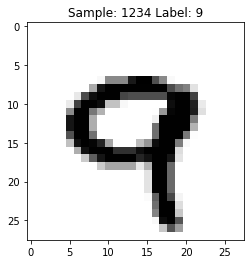

In [11]:
import matplotlib.pyplot as plt

def  display_sample(num):
  print(mnist.train.labels[num])
  label = mnist.train.labels[num].argmax(axis=0)
  image = mnist.train.images[num].reshape([28, 28])
  plt.title('Sample: %d Label: %d' % (num, label))
  plt.imshow(image, cmap=plt.get_cmap('gray_r'))
  plt.show()

display_sample(1234)

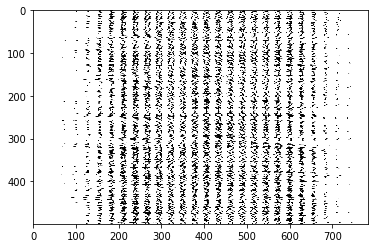

In [12]:
import numpy as np

images = mnist.train.images[0].reshape([1, 784])
for i in range(1, 500):
  images = np.concatenate((images, mnist.train.images[i].reshape([1, 784])))
plt.imshow(images, cmap=plt.get_cmap('gray_r'))
plt.show()

In [0]:
input_images = tf.placeholder(tf.float32, shape=[None, 784])
target_labels = tf.placeholder(tf.float32, shape=[None, 10])

In [0]:
hidden_nodes = 512

input_weights = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
input_biases = tf.Variable(tf.zeros([hidden_nodes]))

hidden_weights = tf.Variable(tf.truncated_normal([hidden_nodes, 10]))
hidden_biases = tf.Variable(tf.zeros([10]))

In [0]:
input_layer = tf.matmul(input_images, input_weights)
hidden_layer = tf.nn.relu(input_layer + input_biases)
digit_weights = tf.matmul(hidden_layer, hidden_weights) + hidden_biases

In [0]:
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=digit_weights, labels=target_labels))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss_function)

In [0]:
correct_prediction = tf.equal(tf.argmax(digit_weights,1), tf.argmax(target_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [24]:
tf.global_variables_initializer().run()

for x in range(2000):
  batch = mnist.train.next_batch(100)
  optimizer.run(feed_dict={input_images: batch[0], target_labels: batch[1]})
  if ((x+1) % 100 == 0):
    print("Training Epoch " + str(x+1))
    print("Accuracy " + str(accuracy.eval(feed_dict={input_images: mnist.test.images, target_labels: mnist.test.labels})))

Training Epoch 100
Accuracy 0.8471
Training Epoch 200
Accuracy 0.8816
Training Epoch 300
Accuracy 0.893
Training Epoch 400
Accuracy 0.8953
Training Epoch 500
Accuracy 0.899
Training Epoch 600
Accuracy 0.9035
Training Epoch 700
Accuracy 0.9061
Training Epoch 800
Accuracy 0.9089
Training Epoch 900
Accuracy 0.9138
Training Epoch 1000
Accuracy 0.9168
Training Epoch 1100
Accuracy 0.9133
Training Epoch 1200
Accuracy 0.9227
Training Epoch 1300
Accuracy 0.9223
Training Epoch 1400
Accuracy 0.9239
Training Epoch 1500
Accuracy 0.9247
Training Epoch 1600
Accuracy 0.924
Training Epoch 1700
Accuracy 0.9281
Training Epoch 1800
Accuracy 0.928
Training Epoch 1900
Accuracy 0.929
Training Epoch 2000
Accuracy 0.9306


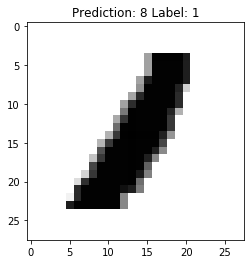

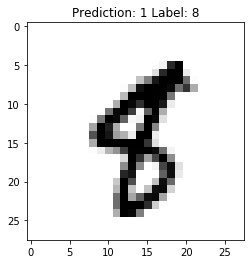

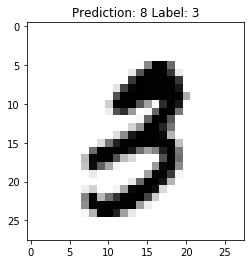

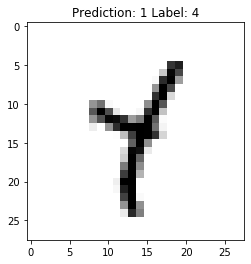

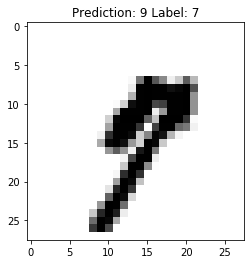

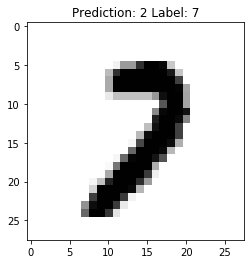

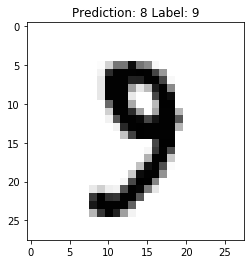

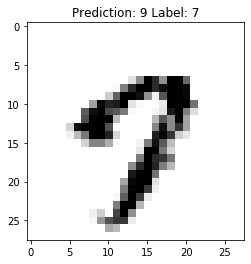

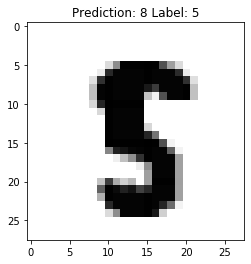

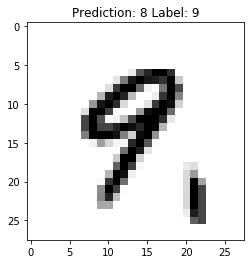

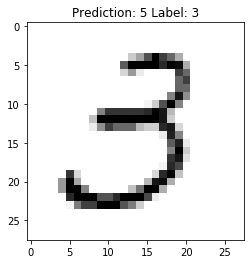

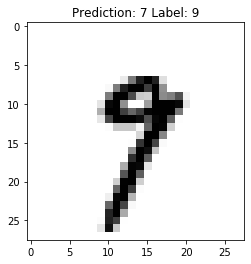

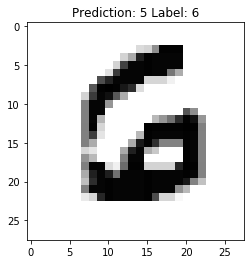

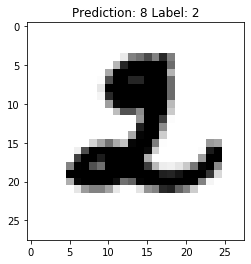

In [29]:
for x in range(500):
  x_train = mnist.train.images[x,:].reshape(1, 784)
  y_train = mnist.train.labels[x,:]

  label = y_train.argmax()

  prediction = sess.run(digit_weights, feed_dict={input_images: x_train}).argmax()

  if(prediction != label):
    plt.title('Prediction: %d Label: %d' % (prediction, label))
    plt.imshow(x_train.reshape([28, 28]), cmap=plt.get_cmap('gray_r'))
    plt.show()


In [0]:
from google.colab import drive
drive.mount('/content/drive')